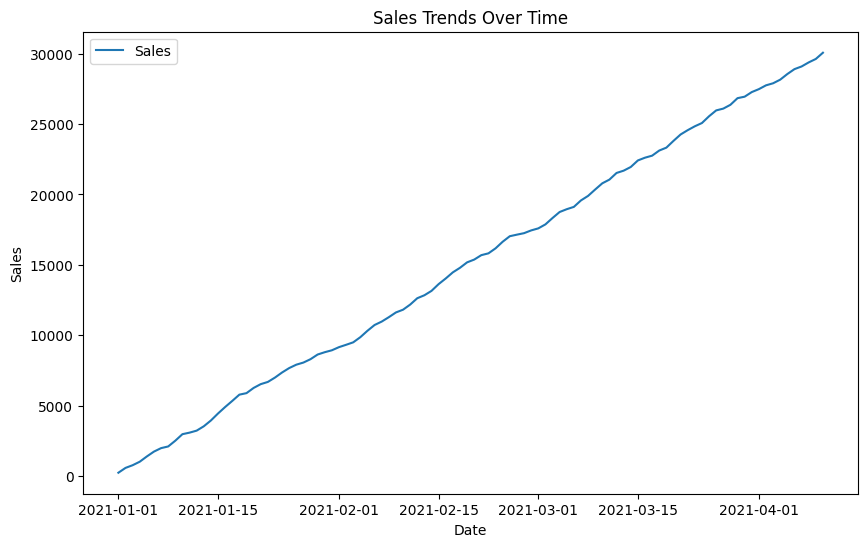

RMSE: 400.52205825819317
MAPE: 0.011672991735825372


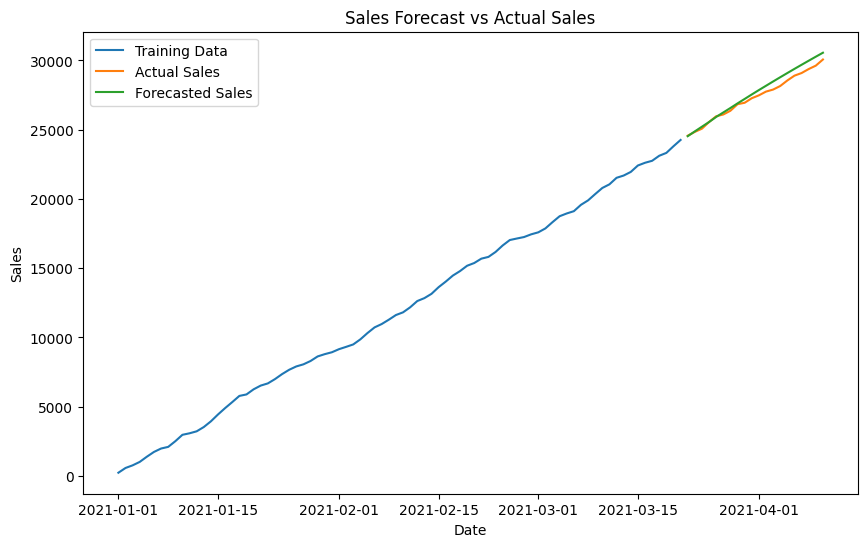

In [3]:
# Install the statsmodels library
#!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Sample Dataset
data = {
    'Date': pd.date_range(start='2021-01-01', periods=100, freq='D'),
    'Sales': np.random.randint(100, 500, size=100).cumsum()  # Simulated sales data
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)
df.index.freq = 'D'  # Explicitly set the frequency

# Plotting the sales data
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Splitting the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fitting the ARIMA model
model = ARIMA(train['Sales'], order=(5, 1, 0))  # Example order (p,d,q)
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

# Evaluating the model
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast))
mape = mean_absolute_percentage_error(test['Sales'], forecast)
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Sales'], label='Training Data')
plt.plot(test.index, test['Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast, label='Forecasted Sales')
plt.title('Sales Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Load the Dataset
df = pd.read_csv(r'C:\Users\dell\Downloads\heart_disease.csv')

# Check for missing or inconsistent data
print("Missing Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

# Clean the dataset
df.drop_duplicates(inplace=True)  # Remove duplicates
df.dropna(inplace=True)  # Drop rows with missing values

# Step 2: Feature Engineering
# Convert Blood Pressure into two separate columns (Systolic and Diastolic)
df['Systolic'] = df['Blood_Pressure'].apply(lambda x: int(x.split('/')[0]))
df['Diastolic'] = df['Blood_Pressure'].apply(lambda x: int(x.split('/')[1]))
df.drop('Blood_Pressure', axis=1, inplace=True)

# Encode categorical variables (Gender and Heart_Disease)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male: 1, Female: 0
df['Heart_Disease'] = label_encoder.fit_transform(df['Heart_Disease'])  # Yes: 1, No: 0

# Normalize numerical features (Age, Cholesterol, Systolic, Diastolic)
scaler = StandardScaler()
df[['Age', 'Cholesterol', 'Systolic', 'Diastolic']] = scaler.fit_transform(df[['Age', 'Cholesterol', 'Systolic', 'Diastolic']])

# Step 3: Model Training
# Split the data into features (X) and target (y)
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Model Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Deliverables
# 1. Trained Logistic Regression Model
# You can save the model using joblib or pickle for future use:
import joblib
joblib.dump(model, 'logistic_regression_model.pkl')

# 2. Evaluation Report
print("\nEvaluation Report:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Missing Values:
 Age               0
Gender            0
Cholesterol       0
Blood_Pressure    0
Heart_Disease     0
dtype: int64

Duplicate Rows: 0
Confusion Matrix:
 [[ 8  1]
 [ 0 12]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.92      1.00      0.96        12

    accuracy                           0.95        21
   macro avg       0.96      0.94      0.95        21
weighted avg       0.96      0.95      0.95        21

Accuracy: 0.95
Precision: 0.92
Recall: 1.00
F1-Score: 0.96

Evaluation Report:
Accuracy: 0.95
Precision: 0.92
Recall: 1.00
F1-Score: 0.96
